In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('customer_churn_data.csv')

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


Initially there were around 300 null values in the InternetService column.
So we will fill those null values with an empty string.

In [4]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [5]:
df["InternetService"]=df["InternetService"].fillna("")

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [8]:
df["Churn"].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt

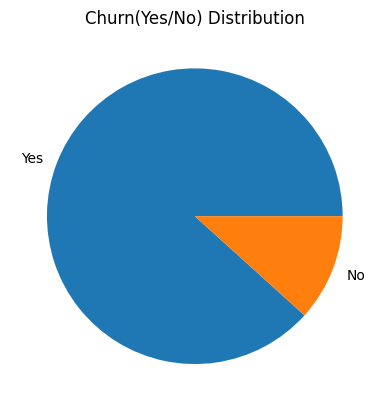

In [10]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn(Yes/No) Distribution")
plt.ylabel("")
plt.show()

In [11]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [12]:
df.groupby(["Churn","Gender"])["MonthlyCharges"].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [13]:
df.groupby("Churn")["Tenure"].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [14]:
df.groupby("Churn")["Age"].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

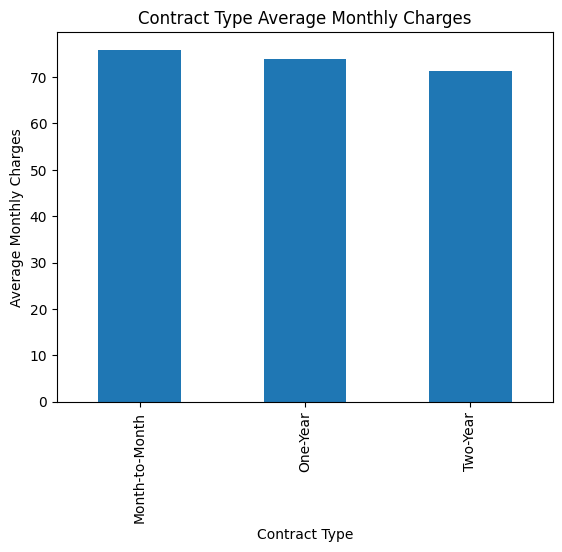

In [15]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Average Monthly Charges")
plt.xlabel("Contract Type")
plt.title("Contract Type Average Monthly Charges")
plt.show()


At the lower terms we can see that the average monthly charge decreases.

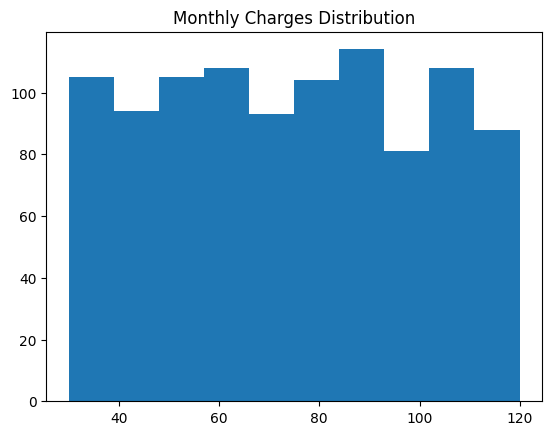

In [16]:
plt.hist(df["MonthlyCharges"])
plt.title("Monthly Charges Distribution")
plt.show()

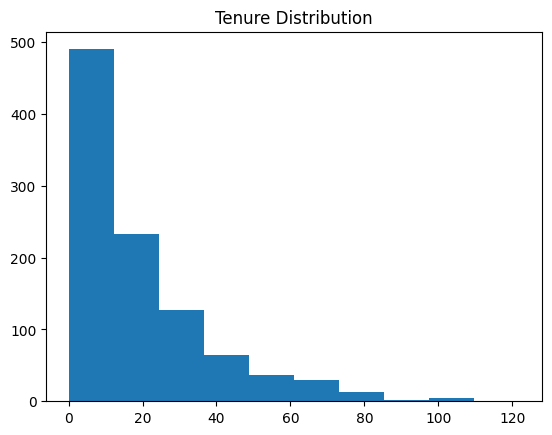

In [17]:
plt.hist(df["Tenure"])
plt.title("Tenure Distribution")
plt.show()

FEATURE ENGINEERING     

In [18]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [19]:
y=df[["Churn"]]
x=df[["Age","Gender","Tenure","MonthlyCharges"]]

In [20]:
x

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [21]:
y

,Churn
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
995,Yes
996,Yes
997,Yes
998,Yes


In [22]:
x["Gender"]=x["Gender"].apply(lambda x: 1 if x=="Female" else 0)
#1 for female 0 for male

C:\Users\arind\AppData\Local\Temp\ipykernel_10316\904402261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Gender"]=x["Gender"].apply(lambda x: 1 if x=="Female" else 0)


In [23]:
x.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [24]:
type(x["Gender"][0])
#shows the datatype of first elemtent in Gender column

numpy.int64

In [25]:
y["Churn"]=y["Churn"].apply(lambda x: 1 if x=="Yes" else 0)
#1 for yes 0 for no

C:\Users\arind\AppData\Local\Temp\ipykernel_10316\3628033920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"]=y["Churn"].apply(lambda x: 1 if x=="Yes" else 0)


In [26]:
y.head()

,Churn
0,1
1,1
2,1
3,1
4,1


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()

In [30]:
x_train=scaler.fit_transform(x_train)

In [31]:
import joblib
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [32]:
x_test=scaler.fit_transform(x_test)

In [33]:
x_train

array([[ 1.10879351,  0.93463164, -0.48397524, -0.42126782],
       [ 0.37484036, -1.06994024, -0.63978216,  0.31380332],
       [ 1.52819531,  0.93463164, -0.6917178 , -0.03322763],
       ...,
       [-1.30276684, -1.06994024, -0.4320396 ,  1.17963974],
       [-1.30276684,  0.93463164,  0.08731679, -0.9853382 ],
       [ 0.16513946,  0.93463164,  1.59345034, -0.91260484]],
      shape=(800, 4))

In [34]:
x_test

array([[-0.15612857,  0.89543386,  0.02377014,  0.9802092 ],
       [-0.71706955, -1.11677706,  0.08174608, -0.58739232],
       [-0.43659906,  0.89543386, -0.96182091, -1.42259639],
       [ 1.33971404,  0.89543386,  2.05292818,  0.60922877],
       [ 0.21783208,  0.89543386, -0.44003742, -1.33254099],
       [-0.53008923,  0.89543386, -0.44003742, -0.12037936],
       [-0.43659906,  0.89543386,  0.54555363, -0.23514023],
       [ 1.43320421,  0.89543386, -0.96182091, -1.56007034],
       [-0.06263841,  0.89543386,  0.42960175,  1.73093652],
       [-0.3431089 ,  0.89543386, -0.5559893 , -1.66168152],
       [ 1.52669437, -1.11677706,  0.08174608, -0.85716005],
       [-1.18452037, -1.11677706,  2.11090412, -0.92609626],
       [-0.15612857, -1.11677706, -0.5559893 , -1.0799077 ],
       [ 0.40481241,  0.89543386,  0.60352958,  1.58429763],
       [-0.81055972, -1.11677706, -0.20813364,  0.8032862 ],
       [-1.18452037, -1.11677706, -0.03420581,  1.61258937],
       [-0.81055972, -1.

In [35]:
from sklearn.metrics import accuracy_score
def modelperformance(prediction):
    print("Accuracy score on model is {}".format(accuracy_score(y_test,prediction)))

In [36]:
from sklearn.model_selection import GridSearchCV


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_model=LogisticRegression()

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
log_model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [41]:
y_pred=log_model.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
modelperformance(y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score on model is 0.905
[[  1  18]
 [  1 180]]
              precision    recall  f1-score   support

           0       0.50      0.05      0.10        19
           1       0.91      0.99      0.95       181

    accuracy                           0.91       200
   macro avg       0.70      0.52      0.52       200
weighted avg       0.87      0.91      0.87       200



In [43]:
modelperformance(y_pred)

Accuracy score on model is 0.905


In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
param_grid={'n_neighbors':[3,5,7,9],
            'weights':['uniform','distance'],
            }

In [46]:
gridkn=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

In [47]:
gridkn.fit(x_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,9


In [48]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [49]:
y_pred=gridkn.predict(x_test)

In [50]:
modelperformance(y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score on model is 0.91
[[  1  18]
 [  0 181]]
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        19
           1       0.91      1.00      0.95       181

    accuracy                           0.91       200
   macro avg       0.95      0.53      0.53       200
weighted avg       0.92      0.91      0.87       200



In [51]:
modelperformance(y_pred)

Accuracy score on model is 0.91


In [52]:
from sklearn.svm import SVC

In [53]:
svm = SVC()

In [54]:
param_grid={
    'C':[0.01,0.1,0.5,1],
    'kernel':['linear','rbf','poly']
}

In [55]:
gridsv=GridSearchCV(svm,param_grid,cv=5)

In [56]:
gridsv.fit(x_train,y_train)

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [57]:
gridsv.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [58]:
y_pred=gridsv.predict(x_test)

In [59]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0  19]
 [  0 181]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.91      1.00      0.95       181

    accuracy                           0.91       200
   macro avg       0.45      0.50      0.48       200
weighted avg       0.82      0.91      0.86       200



In [60]:
modelperformance(y_pred)

Accuracy score on model is 0.905


In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
param_grid={
    "criterion":["gini","entropy"],
    "splitter":["best","random"],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [63]:
grid_tree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

In [64]:
grid_tree.fit(x_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [65]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'random'}

In [66]:
y_pred=grid_tree.predict(x_test)

In [67]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0])

In [68]:
modelperformance(y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score on model is 0.89
[[  4  15]
 [  7 174]]
              precision    recall  f1-score   support

           0       0.36      0.21      0.27        19
           1       0.92      0.96      0.94       181

    accuracy                           0.89       200
   macro avg       0.64      0.59      0.60       200
weighted avg       0.87      0.89      0.88       200



In [69]:
modelperformance(y_pred)

Accuracy score on model is 0.89


In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

In [71]:
param_grid={
    "n_estimators":[32,64,128,256],
    "max_features":[2,3,4],
    "bootstrap":[True,False]
}

In [72]:
grid_rfc=GridSearchCV(rfc_model,param_grid,cv=5)

In [73]:
grid_rfc.fit(x_train,y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [2, 3, ...], 'n_estimators': [32, 64, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,256


In [74]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [75]:
y_pred=grid_rfc.predict(x_test)

In [76]:
modelperformance(y_pred)

Accuracy score on model is 0.865


In [77]:
modelperformance(y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score on model is 0.865
[[  1  18]
 [  9 172]]
              precision    recall  f1-score   support

           0       0.10      0.05      0.07        19
           1       0.91      0.95      0.93       181

    accuracy                           0.86       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.83      0.86      0.85       200



In [80]:
best_model=grid_tree.best_estimator_

In [81]:
joblib.dump(best_model,"model.pkl")

['model.pkl']

In [83]:
x.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')